In this part I introduce a new dataset and apply 3 algorithms(svm,kNN,NN) to see the fitness
download dataset 2 "USPS Handwritten Digits"
https://cs.nyu.edu/~roweis/data.html

In [1]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing


dat = scipy.io.loadmat('C:/Users/Administrator/Desktop/introml-master/PROJECT/usps_nyu/usps_all.mat')

In [2]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [3]:
X = dat['data']
X.shape

(256, 1100, 10)

training picture size is 16*16
transform data into processable form

(1100, 256, 10)


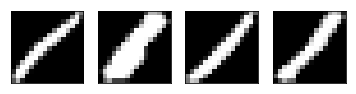

In [4]:
X=X.swapaxes(0,1)
print(X.shape)

Xsamp= X[:,:,0]
ysamp= np.zeros((11000,))

for i in range(1,10):
    samp=X[:,:,i]
    Xsamp=np.vstack((Xsamp,samp))

for i in range(0,9):
    for j in range(0,1100):
        ysamp[i*1100+j]=i+1
ysamp[9900:]=0

Xdigs = Xsamp/255.0*2 - 1

def plt_digit(x):
    nrow = 16
    ncol = 16
    xsq = x.reshape((nrow, ncol)).swapaxes(0,1) 
    plt.imshow(xsq,   cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])



#Select random digits
nplt  = 4
nsamp = Xdigs.shape[0]
Iperm = np.random.permutation(nsamp)

#Plot the images using  the subplot  co   and
for i in range (nplt):
    ind = i
    plt.subplot(1,nplt,i+1) 
    plt_digit(Xdigs[ind,:])

there are 1100 samples respectively for digit 0-9

In [5]:
Xsamp.shape

(11000, 256)

In [6]:
num = 7000
index = np.random.permutation(num)
ntr=num-1000
nts=1000
Xtr=Xsamp[index[:ntr],:]
ytr=ysamp[index[:ntr]]
Xts=Xsamp[index[ntr:ntr+nts],:]
yts=ysamp[index[ntr:ntr+nts]]


use model SVM, the prediction seems not satisfatory

In [7]:
from sklearn import svm
# svc = svm.SVC(probability=False, kernel = 'rbf', C=2.8, gamma=.0073, verbose=10)
svc = svm.SVC(probability=False, kernel = 'rbf', C=2.8, gamma=.0073, verbose=10)
svc.fit(Xtr,ytr)

yhat_ts = svc.predict(Xts)
acc = np.mean(yhat_ts == yts)
print('accuracy = {0:f}'.format(acc))

[LibSVM]accuracy = 0.139000


use model kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(Xtr,ytr)

yhat_ts1 = kNN.predict(Xts)
acc = np.mean(yhat_ts1 == yts)
print('accuracy = {0:f}'.format(acc))

accuracy = 0.964000


the following part uses Neural Network and we can see this model fits best for the USPS dataset

In [9]:
import keras
Xmean=np.mean(Xtr,axis=0)
Xstd=np. std(Xtr,axis=0)
Xtr_scale= (Xtr-Xmean[None, :])/Xstd[None, :]
Xts_scale= (Xts-Xmean[None, :])/Xstd[None, :]

Using TensorFlow backend.


In [10]:
from keras.models import Model, Sequential
from keras.layers import Dense,Activation

In [11]:
import keras.backend as K
K.clear_session()



In [12]:
nin = Xtr_scale.shape[1] # dimension of input data
nh = 256 #number of hidden units
nout = 10 #number of outputs = 10 since there are 10 classes
model= Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation='sigmoid', name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 68,362
Trainable params: 68,362
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_train_begin(self,logs={}):
        # TODO:  Create two empty lists, self.loss and self.val_acc
        self.loss = []
        self.val_acc = []
    def on_batch_end(self, batch, logs={}):
        # TODO:  This is called at the end of each batch.  
        # Add the loss in logs.get('loss') to the loss list
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        # TODO:  This is called at the end of each epoch.  
        # Add the test accuracy in logs.get('val_acc') to the val_acc list
        self.val_acc.append(logs.get('val_acc'))
        
# Create an instance of the history callback
history_cb = LossHistory()

In [14]:
from keras import metrics
from keras import optimizers
opt= optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy' ,
                metrics=['accuracy'])

In [15]:
batch_size = 100
model.fit(Xtr_scale,ytr,epochs=7,batch_size=batch_size,validation_data=(Xts_scale,yts))

Train on 6000 samples, validate on 1000 samples
Epoch 1/7
6000/6000 [==============================] - 0s - loss: 1.1186 - acc: 0.7587 - val_loss: 0.3888 - val_acc: 0.9200
Epoch 2/7
6000/6000 [==============================] - 0s - loss: 0.2731 - acc: 0.9417 - val_loss: 0.2295 - val_acc: 0.9440
Epoch 3/7
6000/6000 [==============================] - 0s - loss: 0.1796 - acc: 0.9590 - val_loss: 0.1821 - val_acc: 0.9530
Epoch 4/7
6000/6000 [==============================] - 0s - loss: 0.1400 - acc: 0.9678 - val_loss: 0.1636 - val_acc: 0.9540
Epoch 5/7
6000/6000 [==============================] - 0s - loss: 0.1159 - acc: 0.9732 - val_loss: 0.1579 - val_acc: 0.9530
Epoch 6/7
6000/6000 [==============================] - 0s - loss: 0.0984 - acc: 0.9762 - val_loss: 0.1462 - val_acc: 0.9580
Epoch 7/7
6000/6000 [==============================] - 0s - loss: 0.0856 - acc: 0.9802 - val_loss: 0.1457 - val_acc: 0.9580


In [21]:
rates= [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []
val_acc_hist = []
# TOJJO
for lr in rates:
    K.clear_session()
    nin = Xtr_scale. shape[1] # dimension of input data
    nh = 256 #number of hidden units
    nout = 10 # number of outputs = 10 since there are 10 classes
    model =Sequential()
    model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    opt= optimizers.Adam(lr=lr)
    model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    model.fit(Xtr_scale, ytr, epochs=10, batch_size=100, validation_data=(Xts_scale,yts))


Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 0s - loss: 0.3616 - acc: 0.8933 - val_loss: 0.1561 - val_acc: 0.9570
Epoch 2/10
6000/6000 [==============================] - 0s - loss: 0.0844 - acc: 0.9755 - val_loss: 0.1360 - val_acc: 0.9620
Epoch 3/10
6000/6000 [==============================] - 0s - loss: 0.0411 - acc: 0.9888 - val_loss: 0.1232 - val_acc: 0.9680
Epoch 4/10
6000/6000 [==============================] - 0s - loss: 0.0197 - acc: 0.9967 - val_loss: 0.1188 - val_acc: 0.9710
Epoch 5/10
6000/6000 [==============================] - 0s - loss: 0.0099 - acc: 0.9992 - val_loss: 0.1190 - val_acc: 0.9720
Epoch 6/10
6000/6000 [==============================] - 0s - loss: 0.0048 - acc: 0.9998 - val_loss: 0.1211 - val_acc: 0.9720
Epoch 7/10
6000/6000 [==============================] - 0s - loss: 0.0034 - acc: 0.9998 - val_loss: 0.1252 - val_acc: 0.9750
Epoch 8/10
6000/6000 [==============================] - 0s - loss: 0.0026 - a